In [1]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
%matplotlib inline
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
pd.set_option('float_format', '{:f}'.format)

C:\Users\anami\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# feature_cols = user_merged.columns.drop(['business_id', 'name', 'address', 'city', 'state_left', 'postal_code',
# #                                     'census_tract', 'median_income', 'review_id', 'review_count_y', 'user__average_stars',
#                                         'user_id', 'review_stars', 'text', 'date', 'review_count_y', 'user__average_stars',
#                                         'rating_score','income_range'])

In [3]:
yelp_compiled = pd.read_csv('Yelp_data/yelp_compiled.csv')


In [4]:
#getting median income range
q3 =yelp_compiled['median_income'].quantile(.75)
q2 =yelp_compiled['median_income'].quantile(.50)
q1 =yelp_compiled['median_income'].quantile(.25)
def income_classifier (x):
    if x >= q3:
        return "1"
    if x <= q1:
        return "0"
    else:
        return "2"
yelp_compiled['income_range'] = yelp_compiled['median_income'].apply(income_classifier)
#yelp_compiled.head()

In [5]:
yelp_compiled.head()

,business_id,name,address,city,state_left,postal_code,latitude,longitude,stars,review_count,new_categories,price_range,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,category,geometry,geoid,county,census_tract,pop_2018,median_income,income_range
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016.000000,33.495194,-112.028588,3.000000,18,Fast Food,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,POINT (-112.0285876 33.4951941),4013108400,Maricopa County,1084.000000,5195,53377.000000,2
1,2DUdvdQE8FOxCHHp59HHzw,Bertha's Café,3134 E Indian School Rd,Phoenix,AZ,85016.000000,33.495821,-112.014668,4.500000,381,"Cafes, Desserts, Sandwiches, Breakfast & Brunch, American, Food, Bakeries",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0,POINT (-112.0146683135 33.4958205544),4013108400,Maricopa County,1084.000000,5195,53377.000000,2
2,MM8n7SPaIuMlDGbUM5SZhA,AMC Dine-in Theatres Esplanade 14,2515 E Camelback Rd,Phoenix,AZ,85016.000000,33.508571,-112.027642,3.000000,763,"Arts & Entertainment, Cinema, Beer, Wine & Spirits, American, Food",2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0,POINT (-112.027642 33.508571),4013108400,Maricopa County,1084.000000,5195,53377.000000,2
3,dPFGRDC3Hsi1mDKxvKz_9Q,MercBar,2525 E Camelback Rd,Phoenix,AZ,85016.000000,33.508730,-112.027564,4.000000,218,"Wine Bars, Cocktail Bars, American, Bars, Nightlife, Lounges",2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,POINT (-112.027564 33.50873),4013108400,Maricopa County,1084.000000,5195,53377.000000,2
4,iGvnkEz2efD9q-Z7ZcasWQ,Papa John's Pizza,2836 E Indian School Rd,Phoenix,AZ,85016.000000,33.495436,-112.019786,1.500000,11,"Italian, Pizza",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,POINT (-112.0197856 33.4954365),4013108400,Maricopa County,1084.000000,5195,53377.000000,2


In [6]:
#stripping white space in front of words in column and getting dummy
yelp_compiled["new_categories"] = yelp_compiled['new_categories'].str.lstrip()


In [7]:
yelp_compiled.shape

(6058, 29)

In [8]:
#creating dummy for categories
yelp_compiled_cat = yelp_compiled['new_categories'].str.get_dummies(',')
#stripping trailing white space from the header after creating dummies
yelp_compiled_cat = yelp_compiled_cat.rename(columns=lambda x: x.strip())
#add up same named columns data after striping white space
yelp_compiled_cat =yelp_compiled_cat.groupby(yelp_compiled_cat.columns, axis=1).sum(numeric_only=True)

In [9]:
yelp_compiled_cat.shape

(6058, 359)

In [10]:
list(yelp_compiled_cat.columns)

['Acai Bowls',
 'Active Life',
 'Adult Entertainment',
 'Afghan',
 'African',
 'Airport Lounges',
 'Airports',
 'American',
 'Amusement Parks',
 'Antiques',
 'Arabian',
 'Arcades',
 'Archery',
 'Argentine',
 'Armenian',
 'Art Classes',
 'Art Galleries',
 'Arts & Entertainment',
 'Asian Fusion',
 'Audio/Visual Equipment Rental',
 'Auto Repair',
 'Automotive',
 'Baby Gear & Furniture',
 'Bagels',
 'Bakeries',
 'Bangladeshi',
 'Barbeque',
 'Barbers',
 'Bars',
 'Beach Bars',
 'Beauty & Spas',
 'Bed & Breakfast',
 'Beer',
 'Beer Bar',
 'Beer Garden',
 'Beer Gardens',
 'Beverage Store',
 'Bingo Halls',
 'Bistros',
 'Books',
 'Bookstores',
 'Bounce House Rentals',
 'Bowling',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'Breweries',
 'Brewpubs',
 'British',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Butcher',
 'Cabaret',
 'Cafes',
 'Cafeteria',
 'Cajun/Creole',
 'Cambodian',
 'Candy Stores',
 'Cantonese',
 'Car Wash',
 'Cardiologists',
 'Caribbean',
 'Casinos',
 'Caterers',
 'Cheese Sho

yelp_compiled.head()

In [11]:
#adding up each category
yelp_compiled_cat.sum(numeric_only =True)


Acai Bowls              12
Active Life             28
Adult Entertainment      8
Afghan                   7
African                 13
                      ... 
Wine & Spirits         124
Wine Bars              110
Wineries                 2
Wraps                   23
Yelp Events              1
Length: 359, dtype: int64

In [12]:
yelp_compiled_cat['ethnic_food'] = yelp_compiled_cat[ 'Ethnic Food']+ yelp_compiled_cat['Greek'] +yelp_compiled_cat['Hawaiian'] + yelp_compiled_cat['Korean']
yelp_compiled_cat['Latin American']+yelp_compiled_cat ['Mediterranean']+ yelp_compiled_cat['Middle Eastern'] +yelp_compiled_cat['Vietnamese']

0       0
1       0
2       0
3       0
4       0
       ..
6053    0
6054    0
6055    0
6056    0
6057    0
Length: 6058, dtype: int64

In [13]:
yelp_compiled_cat = yelp_compiled_cat[yelp_compiled_cat.columns[yelp_compiled_cat.sum()>100]]

In [14]:
print(yelp_compiled_cat.shape)
print(list(yelp_compiled_cat.columns))

(6058, 45)
['American', 'Arts & Entertainment', 'Asian Fusion', 'Bakeries', 'Barbeque', 'Bars', 'Beer', 'Breakfast & Brunch', 'Buffets', 'Burgers', 'Cafes', 'Caterers', 'Chicken Wings', 'Chinese', 'Cocktail Bars', 'Coffee & Tea', 'Delis', 'Desserts', 'Diners', 'Event Planning & Services', 'Fast Food', 'Food', 'Italian', 'Japanese', 'Juice Bars & Smoothies', 'Lounges', 'Mediterranean', 'Mexican', 'Nightlife', 'Pizza', 'Pubs', 'Salad', 'Sandwiches', 'Seafood', 'Soup', 'Specialty Food', 'Sports Bars', 'Steakhouses', 'Sushi Bars', 'Thai', 'Vegan', 'Vegetarian', 'Wine & Spirits', 'Wine Bars', 'ethnic_food']


In [15]:
yelp_compiled_cat['American'] = yelp_compiled_cat['American'].replace(2,1)
yelp_compiled_cat['ethnic_food'] = yelp_compiled_cat['ethnic_food'].replace(2,1)

In [16]:
#cat_drop_list =[ 'Arts & Entertainment', 'Food','Event Planning & Services']
yelp_compiled_cat = yelp_compiled_cat.drop(['Arts & Entertainment', 'Food','Event Planning & Services','Mediterranean'], axis =1)
yelp_compiled_cat.columns = [re.sub(r"\s", '_', x).lower() for x in yelp_compiled_cat]

In [17]:
yelp_compiled_cat.describe()

,american,asian_fusion,bakeries,barbeque,bars,beer,breakfast_&_brunch,buffets,burgers,cafes,caterers,chicken_wings,chinese,cocktail_bars,coffee_&_tea,delis,desserts,diners,fast_food,italian,japanese,juice_bars_&_smoothies,lounges,mexican,nightlife,pizza,pubs,salad,sandwiches,seafood,soup,specialty_food,sports_bars,steakhouses,sushi_bars,thai,vegan,vegetarian,wine_&_spirits,wine_bars,ethnic_food
count,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000
mean,0.202542,0.036811,0.021789,0.030538,0.151205,0.020469,0.110102,0.022780,0.060251,0.040112,0.024761,0.038957,0.053813,0.022450,0.036151,0.027567,0.029713,0.023275,0.226642,0.068009,0.044734,0.020964,0.019478,0.120007,0.156817,0.106306,0.025586,0.055134,0.107296,0.057115,0.017332,0.025421,0.040442,0.032189,0.035325,0.019809,0.017663,0.021459,0.020469,0.018158,0.048366
std,0.401927,0.188313,0.146007,0.172077,0.358278,0.141609,0.313043,0.149213,0.237971,0.196239,0.155408,0.193508,0.225667,0.148153,0.186680,0.163742,0.169808,0.150788,0.418694,0.251783,0.206737,0.143276,0.138210,0.324996,0.363659,0.308254,0.157910,0.228260,0.309515,0.232081,0.130518,0.157413,0.197011,0.176516,0.184616,0.139353,0.131733,0.144921,0.141609,0.133533,0.214556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#joining category columns to origin dataframe
yelp_compiled_new =yelp_compiled.join(yelp_compiled_cat)

In [19]:
yelp_compiled_new.describe()

,postal_code,latitude,longitude,stars,review_count,price_range,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,category,geoid,census_tract,pop_2018,median_income,american,asian_fusion,bakeries,barbeque,bars,beer,breakfast_&_brunch,buffets,burgers,cafes,caterers,chicken_wings,chinese,cocktail_bars,coffee_&_tea,delis,desserts,diners,fast_food,italian,japanese,juice_bars_&_smoothies,lounges,mexican,nightlife,pizza,pubs,salad,sandwiches,seafood,soup,specialty_food,sports_bars,steakhouses,sushi_bars,thai,vegan,vegetarian,wine_&_spirits,wine_bars,ethnic_food
count,6052.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000,6058.000000
mean,87527.569233,35.111815,-113.973701,3.428524,218.122648,1.542423,0.014031,0.014361,0.017910,0.024100,0.026824,0.032849,0.077253,0.017663,0.617283,0.226642,21094456811.729282,718.662027,4195.815121,56162.822099,0.202542,0.036811,0.021789,0.030538,0.151205,0.020469,0.110102,0.022780,0.060251,0.040112,0.024761,0.038957,0.053813,0.022450,0.036151,0.027567,0.029713,0.023275,0.226642,0.068009,0.044734,0.020964,0.019478,0.120007,0.156817,0.106306,0.025586,0.055134,0.107296,0.057115,0.017332,0.025421,0.040442,0.032189,0.035325,0.019809,0.017663,0.021459,0.020469,0.018158,0.048366
std,1996.678145,1.276770,1.525753,0.827498,421.407965,0.617771,0.117628,0.118984,0.132480,0.153373,0.161454,0.178256,0.267015,0.131733,0.485708,0.418694,13651471855.336304,1390.402076,2134.971251,21927.243875,0.401927,0.188313,0.146007,0.172077,0.358278,0.141609,0.313043,0.149213,0.237971,0.196239,0.155408,0.193508,0.225667,0.148153,0.186680,0.163742,0.169808,0.150788,0.418694,0.251783,0.206737,0.143276,0.138210,0.324996,0.363659,0.308254,0.157910,0.228260,0.309515,0.232081,0.130518,0.157413,0.197011,0.176516,0.184616,0.139353,0.131733,0.144921,0.141609,0.133533,0.214556
min,85001.000000,33.266520,-115.452994,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4013082002.000000,1.010000,0.000000,16206.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85032.000000,33.530918,-115.205554,3.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4013113700.000000,29.480000,2675.000000,37694.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,89104.000000,36.083840,-115.135272,3.500000,84.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,32003002000.000000,58.510000,4128.000000,53383.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [20]:
yelp_compiled_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             6058 non-null   object 
 1   name                    6058 non-null   object 
 2   address                 6022 non-null   object 
 3   city                    6058 non-null   object 
 4   state_left              6058 non-null   object 
 5   postal_code             6052 non-null   float64
 6   latitude                6058 non-null   float64
 7   longitude               6058 non-null   float64
 8   stars                   6058 non-null   float64
 9   review_count            6058 non-null   int64  
 10  new_categories          6058 non-null   object 
 11  price_range             6058 non-null   float64
 12  romantic                6058 non-null   float64
 13  intimate                6058 non-null   float64
 14  touristy                6058 non-null   

In [21]:
yelp_compiled_new.median_income.describe()

count     6058.000000
mean     56162.822099
std      21927.243875
min      16206.000000
25%      37694.000000
50%      53383.000000
75%      73200.000000
max     173056.000000
Name: median_income, dtype: float64

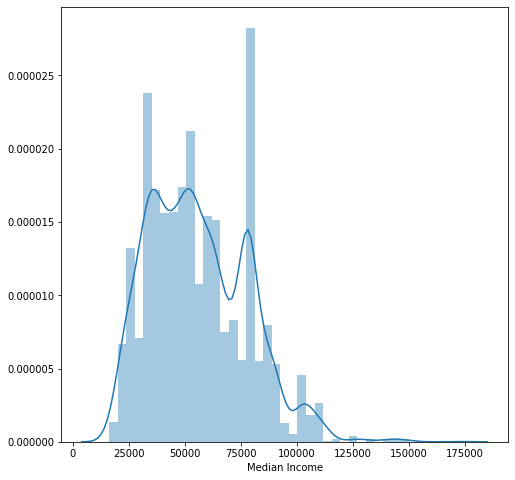

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(yelp_compiled_new.median_income)
plt.xlabel('Median Income');

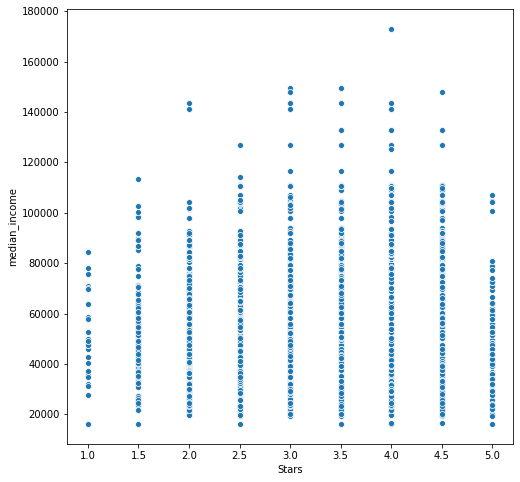

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = yelp_compiled_new, x ='stars', y ='median_income')
plt.xlabel('Stars');

In [24]:
list(yelp_compiled.columns)

['business_id',
 'name',
 'address',
 'city',
 'state_left',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'new_categories',
 'price_range',
 'romantic',
 'intimate',
 'touristy',
 'hipster',
 'divey',
 'classy',
 'trendy',
 'upscale',
 'casual',
 'category',
 'geometry',
 'geoid',
 'county',
 'census_tract',
 'pop_2018',
 'median_income',
 'income_range']

In [25]:
d = {'business_id':'business','price_range': 'avg_pric_range', 'romantic':'avg_romantic','intimate':'avg_intimate', 'touristy':'average_touristy', 
     'hipster':'avg_hipster', 'divey':'avg_divey', 'classy':'avg_classey', 'trendy':'avg_trendy','upscale': 'avg_upscale',
     'casual':'avg_casual'}
yelp_compiled_tract =yelp_compiled_new.groupby(['census_tract','city'], as_index= False).agg({'review_count':'sum','stars':'mean','business_id':'count','price_range': 'mean', 'romantic':'mean', 
                                                                                 'intimate':'mean', 'touristy':'mean', 'hipster':'mean', 
                                                                                 'divey':'mean','classy':'mean', 'trendy':'mean','upscale': 'mean', 
                                                                                 'casual':'mean', 'median_income':'mean', 'pop_2018':'mean',
                                                                                    'american':'mean', 'asian_fusion':'mean', 'bakeries':'mean', 'barbeque':'mean', 'bars':'mean', 'beer':'mean', 'breakfast_&_brunch':'mean', 'buffets':'mean',
                                                                                              'burgers':'mean', 'cafes':'mean', 'caterers':'mean', 'chicken_wings':'mean', 'chinese':'mean', 'cocktail_bars':'mean', 'coffee_&_tea':'mean', 'delis':'mean', 
                                                                                              'desserts':'mean', 'diners':'mean', 'fast_food':'mean', 'italian':'mean', 'japanese':'mean', 'juice_bars_&_smoothies':'mean', 'lounges':'mean', 'mexican':'mean',
                                                                                              'nightlife':'mean', 'pizza':'mean', 'pubs':'mean', 'salad':'mean', 'sandwiches':'mean', 'seafood':'mean', 'soup':'mean', 'specialty_food':'mean', 'sports_bars':'mean', 
                                                                                              'steakhouses':'mean', 'sushi_bars':'mean', 'thai':'mean', 'vegan':'mean', 'vegetarian':'mean', 'wine_&_spirits':'mean', 'wine_bars':'mean', 'ethnic_food':'mean'}).rename(columns=d)
yelp_compiled_tract['resturant_density'] = yelp_compiled_tract['pop_2018']/yelp_compiled_tract['business'] 
yelp_compiled_tract['income_range'] = yelp_compiled_tract['median_income'].apply(income_classifier)

In [26]:
320*2


640

In [27]:
print(list(yelp_compiled_cat.columns))

['american', 'asian_fusion', 'bakeries', 'barbeque', 'bars', 'beer', 'breakfast_&_brunch', 'buffets', 'burgers', 'cafes', 'caterers', 'chicken_wings', 'chinese', 'cocktail_bars', 'coffee_&_tea', 'delis', 'desserts', 'diners', 'fast_food', 'italian', 'japanese', 'juice_bars_&_smoothies', 'lounges', 'mexican', 'nightlife', 'pizza', 'pubs', 'salad', 'sandwiches', 'seafood', 'soup', 'specialty_food', 'sports_bars', 'steakhouses', 'sushi_bars', 'thai', 'vegan', 'vegetarian', 'wine_&_spirits', 'wine_bars', 'ethnic_food']


In [28]:
yelp_compiled_tract.head(2)

,census_tract,city,review_count,stars,business,avg_pric_range,avg_romantic,avg_intimate,average_touristy,avg_hipster,avg_divey,avg_classey,avg_trendy,avg_upscale,avg_casual,median_income,pop_2018,american,asian_fusion,bakeries,barbeque,bars,beer,breakfast_&_brunch,buffets,burgers,cafes,caterers,chicken_wings,chinese,cocktail_bars,coffee_&_tea,delis,desserts,diners,fast_food,italian,japanese,juice_bars_&_smoothies,lounges,mexican,nightlife,pizza,pubs,salad,sandwiches,seafood,soup,specialty_food,sports_bars,steakhouses,sushi_bars,thai,vegan,vegetarian,wine_&_spirits,wine_bars,ethnic_food,resturant_density,income_range
0,1.010000,Las Vegas,217,3.000000,8,1.250000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,57945.000000,7174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,896.750000,2
1,1.030000,Las Vegas,1519,3.400000,15,1.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.733333,36239.000000,5923,0.133333,0.066667,0.000000,0.066667,0.133333,0.133333,0.066667,0.000000,0.000000,0.066667,0.066667,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.400000,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.000000,0.066667,0.133333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.133333,0.133333,0.000000,0.066667,394.866667,0


In [29]:
yelp_compiled_tract.describe()

,census_tract,review_count,stars,business,avg_pric_range,avg_romantic,avg_intimate,average_touristy,avg_hipster,avg_divey,avg_classey,avg_trendy,avg_upscale,avg_casual,median_income,pop_2018,american,asian_fusion,bakeries,barbeque,bars,beer,breakfast_&_brunch,buffets,burgers,cafes,caterers,chicken_wings,chinese,cocktail_bars,coffee_&_tea,delis,desserts,diners,fast_food,italian,japanese,juice_bars_&_smoothies,lounges,mexican,nightlife,pizza,pubs,salad,sandwiches,seafood,soup,specialty_food,sports_bars,steakhouses,sushi_bars,thai,vegan,vegetarian,wine_&_spirits,wine_bars,ethnic_food,resturant_density
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,904.669400,2141.632091,3.357198,9.818476,1.408093,0.008539,0.008453,0.003778,0.013482,0.039928,0.013890,0.038708,0.004887,0.550081,55551.044155,4577.683955,0.169898,0.024877,0.016172,0.025949,0.118277,0.017172,0.100020,0.018717,0.052351,0.029806,0.023649,0.047317,0.050869,0.009753,0.030185,0.027891,0.019928,0.019784,0.273036,0.057393,0.028280,0.013864,0.009971,0.154994,0.122242,0.116205,0.028811,0.041927,0.102939,0.048914,0.013333,0.028336,0.043101,0.018585,0.027482,0.018654,0.011518,0.015022,0.017172,0.010317,0.038377,1442.242217
std,1542.109303,11488.321476,0.549576,19.768780,0.332072,0.051725,0.031495,0.042832,0.053979,0.119880,0.048953,0.087719,0.030477,0.313527,23444.750247,1950.734964,0.226933,0.074137,0.059344,0.084922,0.190903,0.067315,0.180945,0.069872,0.116853,0.091481,0.076456,0.117572,0.112419,0.034351,0.101577,0.098672,0.063756,0.075752,0.267042,0.119436,0.065919,0.039860,0.041199,0.221528,0.192396,0.173773,0.107923,0.094562,0.165724,0.111823,0.059665,0.090349,0.126950,0.069843,0.074107,0.072829,0.053971,0.049420,0.067315,0.041986,0.089479,1752.303237
min,1.010000,3.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16206.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.960000,116.000000,3.058824,3.000000,1.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,37250.000000,3290.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,363.833333
50%,61.030000,464.000000,3.423077,6.000000,1.387097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.588235,52672.000000,4332.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,739.625000
75%,1109.020000,1734.000000,3.700000,11.000000,1.600000,0.

In [30]:
yelp_compiled_tract.head()

,census_tract,city,review_count,stars,business,avg_pric_range,avg_romantic,avg_intimate,average_touristy,avg_hipster,avg_divey,avg_classey,avg_trendy,avg_upscale,avg_casual,median_income,pop_2018,american,asian_fusion,bakeries,barbeque,bars,beer,breakfast_&_brunch,buffets,burgers,cafes,caterers,chicken_wings,chinese,cocktail_bars,coffee_&_tea,delis,desserts,diners,fast_food,italian,japanese,juice_bars_&_smoothies,lounges,mexican,nightlife,pizza,pubs,salad,sandwiches,seafood,soup,specialty_food,sports_bars,steakhouses,sushi_bars,thai,vegan,vegetarian,wine_&_spirits,wine_bars,ethnic_food,resturant_density,income_range
0,1.010000,Las Vegas,217,3.000000,8,1.250000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,57945.000000,7174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,896.750000,2
1,1.030000,Las Vegas,1519,3.400000,15,1.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.733333,36239.000000,5923,0.133333,0.066667,0.000000,0.066667,0.133333,0.133333,0.066667,0.000000,0.000000,0.066667,0.066667,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.400000,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.000000,0.066667,0.133333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.133333,0.133333,0.000000,0.066667,394.866667,0
2,1.050000,Las Vegas,1869,3.210526,19,1.210526,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.473684,51396.000000,3981,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.157895,0.315789,0.000000,0.052632,0.052632,0.000000,0.052632,0.000000,0.052632,0.000000,0.052632,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,209.526316,2
3,1.060000,Las Vegas,607,3.375000,4,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,22326.000000,4113,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1028.250000,0
4,1.070000,Las Vegas,756,3.333333,9,1.666667,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.444444,36027.000000,3766,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.222222,0.111111,0.222222,0.111111,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,418.444444,0


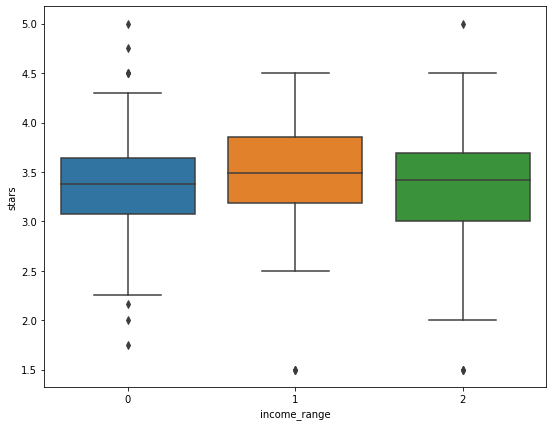

In [51]:
fig, ax = plt.subplots(figsize = (9,7))
sns.boxplot(x = 'income_range', y = 'stars', data = yelp_compiled_tract);

In [32]:
feature_cols = yelp_compiled_tract.columns.drop([ 'city', 'census_tract', 'median_income', 'income_range'])

In [33]:
X= yelp_compiled_tract[feature_cols]
y= yelp_compiled_tract['income_range']

In [34]:
print(X.shape)
print(y.shape)

(617, 56)
(617,)


In [35]:
yelp_compiled['median_income'].value_counts()

78250.000000     394
32188.000000     146
25185.000000     117
52917.000000      86
49688.000000      82
                ... 
63956.000000       1
37159.000000       1
41397.000000       1
86154.000000       1
104978.000000      1
Name: median_income, Length: 610, dtype: int64

In [36]:
list(yelp_compiled.columns)

['business_id',
 'name',
 'address',
 'city',
 'state_left',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'new_categories',
 'price_range',
 'romantic',
 'intimate',
 'touristy',
 'hipster',
 'divey',
 'classy',
 'trendy',
 'upscale',
 'casual',
 'category',
 'geometry',
 'geoid',
 'county',
 'census_tract',
 'pop_2018',
 'median_income',
 'income_range']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.2, random_state = 321)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
%time
clf= LogisticRegression()
clf.fit(X_train, y_train)
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Wall time: 0 ns
Coefficients:  [[-9.69628589e-06  3.99910388e-02  1.72543484e-03 -1.82535983e-02
  -1.58101891e-03 -5.18326953e-04 -8.17437783e-04 -7.61940658e-04
   7.55247523e-03 -2.80273982e-03 -3.30651158e-03 -1.42656250e-03
  -3.65801153e-02 -4.58130229e-05 -1.50846727e-02  2.03350422e-03
  -3.60547959e-03  4.20769167e-03 -2.07425106e-02 -8.27356640e-04
  -7.44008989e-03  6.98139221e-03 -2.25689392e-03 -2.51273704e-03
   2.80807959e-03 -3.04443108e-03  4.07699486e-03 -1.69446728e-03
  -4.04187438e-03 -3.59207248e-03 -4.06935432e-03  5.52241620e-04
   1.98731534e-02 -7.91153764e-03 -3.16477188e-03 -6.68823603e-04
  -9.97287220e-04  2.68783795e-02 -2.09717033e-02 -1.34714199e-02
  -3.82657276e-03 -7.29746014e-03 -6.66447423e-03  7.52242180e-03
   1.43030127e-04  2.51985372e-03 -1.04703620e-02 -1.85539923e-03
  -1.77044045e-03 -6.74935389e-04 -8.33842891e-04 -1.90331423e-03
  -8.27356640e-04 -3.28633298e-03 -4.02358265e-04 -7.44644250e-05]
 [ 6.46684666e-05 -1.64677786e-01 -1.4361366

C:\Users\anami\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
probas = clf.predict_proba(X_train)
preds = clf.predict(X_train)

In [41]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.5645161290322581

In [43]:
print(confusion_matrix(y_test, y_pred))

[[ 0  1 32]
 [ 0  0 20]
 [ 0  1 70]]


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
bc_scaled = scaler.fit_transform(X)

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=2)
pca.fit(bc_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

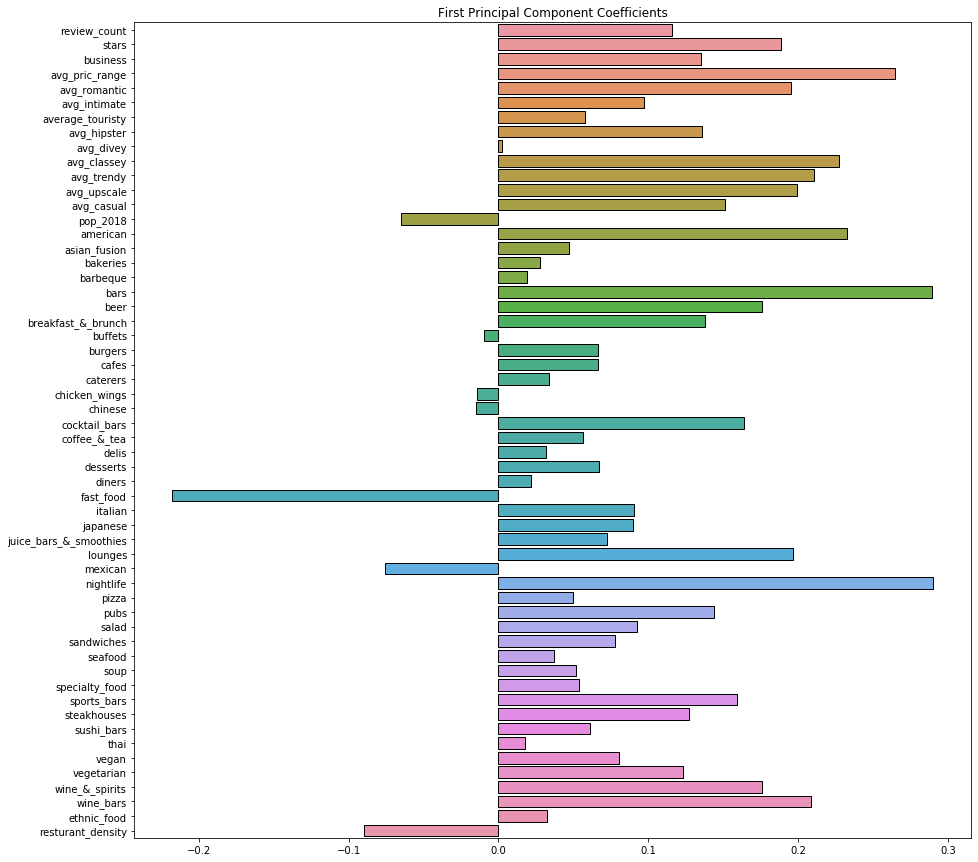

In [49]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = pca.inverse_transform((1,0)), y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('First Principal Component Coefficients');

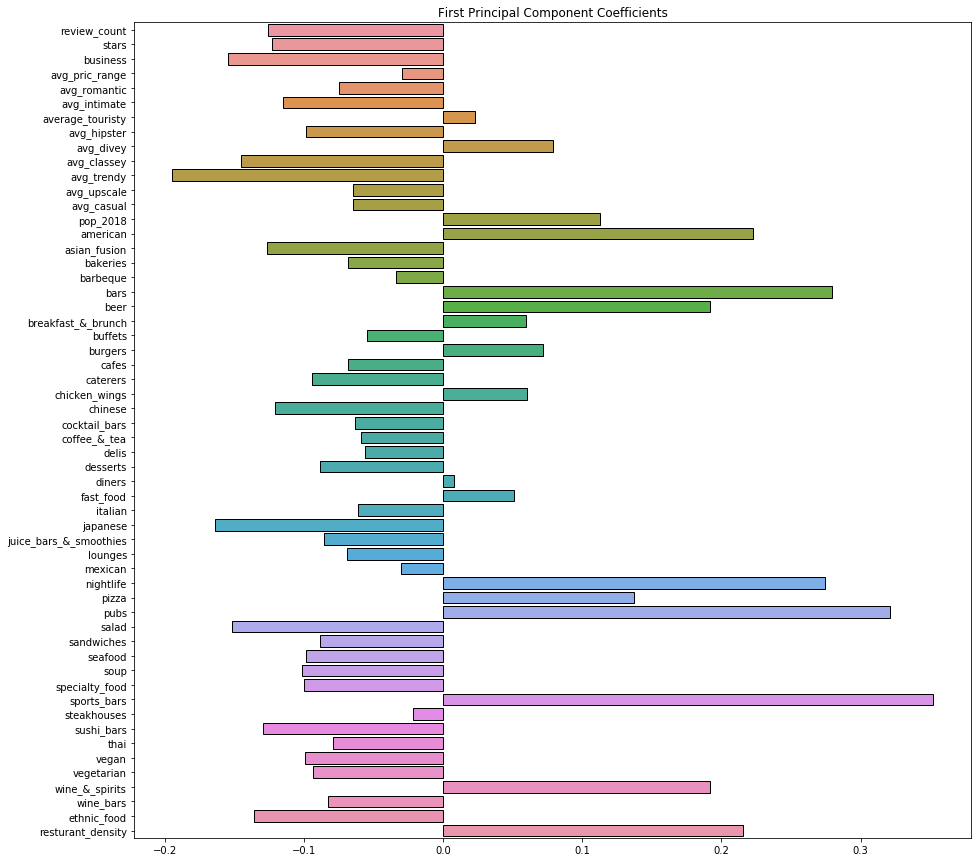

In [50]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = pca.inverse_transform((0,1)), y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('First Principal Component Coefficients');